In [15]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from pylab import *
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from copy import deepcopy
import torch.nn.functional as F
import torch

In [58]:
def get_all_keys(h5file):
    keys = []
    def visit_func(name):
        keys.append(name)
    h5file.visit(visit_func)
    return keys

# Replace 'your_file.h5' with the actual filename
file_path  = '/sdf/scratch/adave/CookieSimSlim_data/test.00.h5'
file_path1 = '/sdf/scratch/adave/CookieSimSlim_data/test.01.h5'
file_path2 = '/sdf/scratch/adave/CookieSimSlim_data/test.02.h5'
file_path3 = '/sdf/scratch/adave/CookieSimSlim_data/test.03.h5'
file_path4 = '/sdf/scratch/adave/CookieSimSlim_data/test.04.h5'
file_path5 = '/sdf/scratch/adave/CookieSimSlim_data/test.05.h5'
file_path6 = '/sdf/scratch/adave/CookieSimSlim_data/test.06.h5'
file_path7 = '/sdf/scratch/adave/CookieSimSlim_data/test.07.h5'
file_path8 = '/sdf/scratch/adave/CookieSimSlim_data/test.08.h5'
file_path9 = '/sdf/scratch/adave/CookieSimSlim_data/test.09.h5'
file_path10 = '/sdf/scratch/adave/CookieSimSlim_data/test.10.h5'
file_path11 = '/sdf/scratch/adave/CookieSimSlim_data/test.11.h5'
file_path12 = '/sdf/scratch/adave/CookieSimSlim_data/test.12.h5'
file_path13 = '/sdf/scratch/adave/CookieSimSlim_data/test.13.h5'
file_path14 = '/sdf/scratch/adave/CookieSimSlim_data/test.14.h5'
file_path15 = '/sdf/scratch/adave/CookieSimSlim_data/test.15.h5'
def print_structure(name, item):
    #print(f"Name: {name}, Type: {type(item)}")
    print(f"Name: {name}")

with h5py.File(file_path15, 'r') as h5file:
    print("Structure of the HDF5 file:")
    h5file.visititems(print_structure)


Structure of the HDF5 file:
Name: 03895d6616671341afb02113fe9bfe26b31a310b
Name: 03895d6616671341afb02113fe9bfe26b31a310b/Xaddresses
Name: 03895d6616671341afb02113fe9bfe26b31a310b/Xhits
Name: 03895d6616671341afb02113fe9bfe26b31a310b/Ximg
Name: 03895d6616671341afb02113fe9bfe26b31a310b/Xnedges
Name: 03895d6616671341afb02113fe9bfe26b31a310b/Ypdf
Name: 03895d6616671341afb02113fe9bfe26b31a310b/overcounts
Name: 03895d6616671341afb02113fe9bfe26b31a310b/words
Name: 0ae1c279a751c90098cf30c22352bae39bcf84d7
Name: 0ae1c279a751c90098cf30c22352bae39bcf84d7/Xaddresses
Name: 0ae1c279a751c90098cf30c22352bae39bcf84d7/Xhits
Name: 0ae1c279a751c90098cf30c22352bae39bcf84d7/Ximg
Name: 0ae1c279a751c90098cf30c22352bae39bcf84d7/Xnedges
Name: 0ae1c279a751c90098cf30c22352bae39bcf84d7/Ypdf
Name: 0ae1c279a751c90098cf30c22352bae39bcf84d7/overcounts
Name: 0ae1c279a751c90098cf30c22352bae39bcf84d7/words
Name: 0e05093dad9065b44b1266d35f3ccf878e82a643
Name: 0e05093dad9065b44b1266d35f3ccf878e82a643/Xaddresses
Name: 0e050

Name: a4dca0cdf7cceb740083683936a60f128c2cd954/Xnedges
Name: a4dca0cdf7cceb740083683936a60f128c2cd954/Ypdf
Name: a4dca0cdf7cceb740083683936a60f128c2cd954/overcounts
Name: a4dca0cdf7cceb740083683936a60f128c2cd954/words
Name: a554cda427bc226cc5c9923ef4ea1e8be7c90716
Name: a554cda427bc226cc5c9923ef4ea1e8be7c90716/Xaddresses
Name: a554cda427bc226cc5c9923ef4ea1e8be7c90716/Xhits
Name: a554cda427bc226cc5c9923ef4ea1e8be7c90716/Ximg
Name: a554cda427bc226cc5c9923ef4ea1e8be7c90716/Xnedges
Name: a554cda427bc226cc5c9923ef4ea1e8be7c90716/Ypdf
Name: a554cda427bc226cc5c9923ef4ea1e8be7c90716/overcounts
Name: a554cda427bc226cc5c9923ef4ea1e8be7c90716/words
Name: a5c49dde9dd83693d7673273b846d63144814c07
Name: a5c49dde9dd83693d7673273b846d63144814c07/Xaddresses
Name: a5c49dde9dd83693d7673273b846d63144814c07/Xhits
Name: a5c49dde9dd83693d7673273b846d63144814c07/Ximg
Name: a5c49dde9dd83693d7673273b846d63144814c07/Xnedges
Name: a5c49dde9dd83693d7673273b846d63144814c07/Ypdf
Name: a5c49dde9dd83693d7673273b846d63

Shape of 111623c24c807284ba5728c7b595be149ddc56f4/Ypdf: (128, 512)


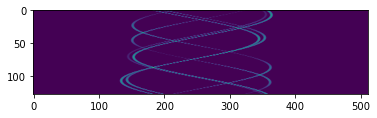

Shape of 111623c24c807284ba5728c7b595be149ddc56f4/Ximg: (128, 512)


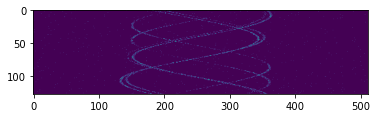

In [3]:
with h5py.File(file_path, 'r') as h5file:
    # Replace '111623c24c807284ba5728c7b595be149ddc56f4/Ypdf' and '111623c24c807284ba5728c7b595be149ddc56f4/Ximg' 
    # with the actual paths to your datasets
    dataset_Ypdf = '111623c24c807284ba5728c7b595be149ddc56f4/Ypdf'
    dataset_Ximg = '111623c24c807284ba5728c7b595be149ddc56f4/Ximg'
    
    # Check if the dataset_Ypdf exists
    if dataset_Ypdf in h5file:
        # Read the dataset
        ypdf_data = h5file[dataset_Ypdf][:]
        print(f"Shape of {dataset_Ypdf}: {ypdf_data.shape}")
        
        # Plot the data
        plt.imshow(ypdf_data)
        plt.show()
    else:
        print(f"Dataset '{dataset_Ypdf}' not found in the HDF5 file.")
    
    # Check if the dataset_Ximg exists
    if dataset_Ximg in h5file:
        # Read the dataset
        ximg_data = h5file[dataset_Ximg][:]
        print(f"Shape of {dataset_Ximg}: {ximg_data.shape}")
        
        # Plot the data
        plt.imshow(ximg_data)
        plt.show()
    else:
        print(f"Dataset '{dataset_Ximg}' not found in the HDF5 file.")

Shape of 02c3eee5e6b4192a63d02638505e667777e68763/Ypdf: (128, 512)


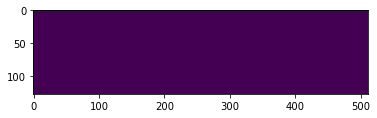

Shape of 02c3eee5e6b4192a63d02638505e667777e68763/Ximg: (128, 512)


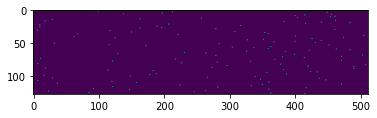

In [4]:
with h5py.File(file_path1, 'r') as h5file:
    # Replace '111623c24c807284ba5728c7b595be149ddc56f4/Ypdf' and '111623c24c807284ba5728c7b595be149ddc56f4/Ximg' 
    # with the actual paths to your datasets
    dataset_Ypdf1 = '02c3eee5e6b4192a63d02638505e667777e68763/Ypdf'
    dataset_Ximg1 = '02c3eee5e6b4192a63d02638505e667777e68763/Ximg'
    
    # Check if the dataset_Ypdf exists
    if dataset_Ypdf1 in h5file:
        # Read the dataset
        ypdf_data1 = h5file[dataset_Ypdf1][:]
        print(f"Shape of {dataset_Ypdf1}: {ypdf_data1.shape}")
        
        # Plot the data
        plt.imshow(ypdf_data1)
        plt.show()
    else:
        print(f"Dataset '{dataset_Ypdf1}' not found in the HDF5 file.")
    
    # Check if the dataset_Ximg exists
    if dataset_Ximg1 in h5file:
        # Read the dataset
        ximg_data1 = h5file[dataset_Ximg1][:]
        print(f"Shape of {dataset_Ximg1}: {ximg_data1.shape}")
        
        # Plot the data
        plt.imshow(ximg_data1)
        plt.show()
    else:
        print(f"Dataset '{dataset_Ximg1}' not found in the HDF5 file.")

Data for 03a5eadf92cbcd9be66c609fb2e494fd3659a88d/Ximg:
(128, 512)


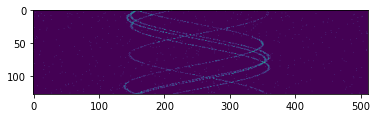

Data for 081b984ad3ea7dd0ca89059279e4eadc06647607/Ximg:
(128, 512)


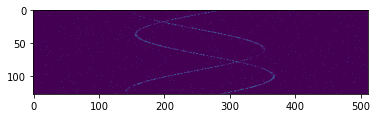

Data for 0d240df382fef7a5c4e029680c60c5b0fd6c4a2c/Ximg:
(128, 512)


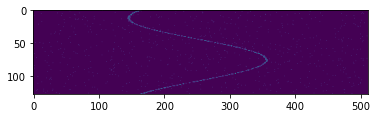

Data for 10b6590e6ae05609d007fa506ee32a6023257921/Ximg:
(128, 512)


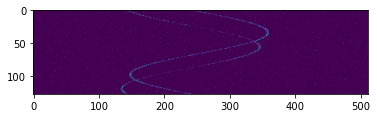

Data for 111623c24c807284ba5728c7b595be149ddc56f4/Ximg:
(128, 512)


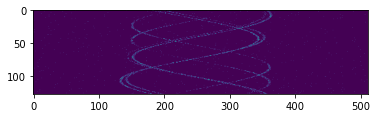

Data for 1443fe24a0519d2a84bf9530f1b1b3480427cfc1/Ximg:
(128, 512)


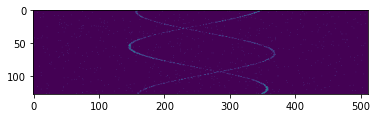

Data for 155bc016ac535aa84e208be670582a889c3cf334/Ximg:
(128, 512)


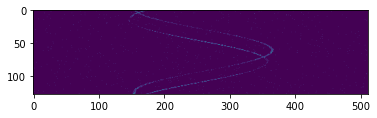

Data for 1568161ea08d0963a15e225d07270a7ed83980ce/Ximg:
(128, 512)


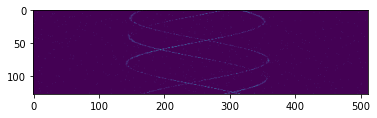

Data for 163f02ac3064645c75c1ae82be978f03566b104c/Ximg:
(128, 512)


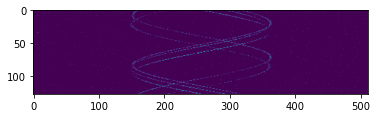

Data for 190104734b0bb388f29e234796e644e835d585e8/Ximg:
(128, 512)


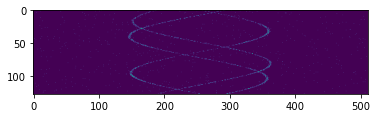

Data for 1cc039fdc47f6b9a6818938de78ad96c11f55c27/Ximg:
(128, 512)


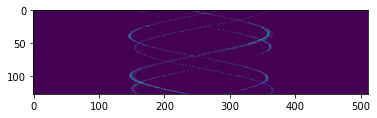

Data for 20af6be2f6ff005f57cb4e383283fdaaed2500d9/Ximg:
(128, 512)


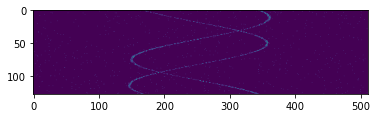

Data for 23a808b9fdf430749ddc6fe57ebda2f8b69117b3/Ximg:
(128, 512)


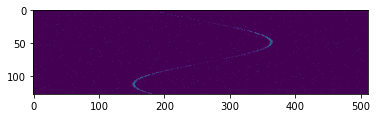

Data for 240331247294e079df72566b8ae89446e7043c5d/Ximg:
(128, 512)


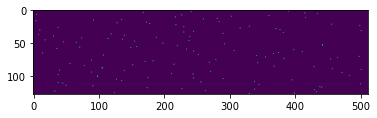

Data for 29ceaf473a8a6d3aae2d275bb4f56c5e9c2833d2/Ximg:
(128, 512)


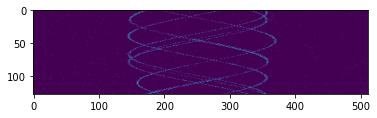

Data for 2baa987d74ef1a402f97b2cabcc9923cf8282e8f/Ximg:
(128, 512)


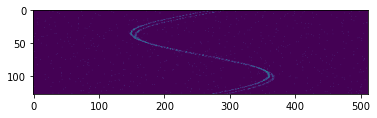

Data for 2f82249f2429339b29282206217fd1a441916626/Ximg:
(128, 512)


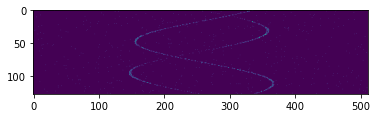

Data for 3061dc332086508f3ad75bb94a40ff7f8020f295/Ximg:
(128, 512)


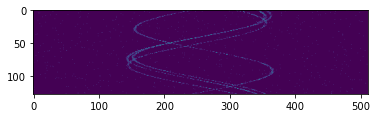

Data for 30d7d612600534ef1f06987e2f5156bd9934d6ce/Ximg:
(128, 512)


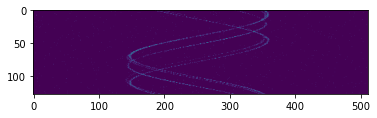

Data for 39794cf0d9d6958aa48b324118a6c9d74a4d5c53/Ximg:
(128, 512)


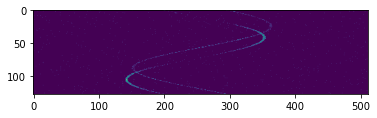

Data for 3c64548238ad76a00106347be0c835a0aec10cd4/Ximg:
(128, 512)


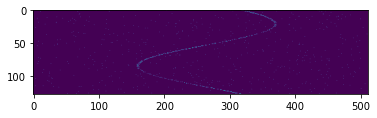

Data for 3e08c1244f726a2d32f17992e9f63b027e38a1b1/Ximg:
(128, 512)


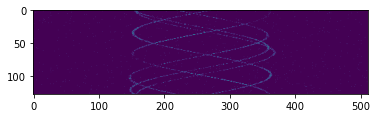

Data for 41a06bba747c13439d0288df1e3420fe6985ecb2/Ximg:
(128, 512)


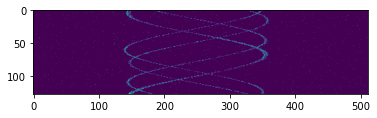

Data for 469904243d8e2d2fd3b486fa56f5f2bc973fa678/Ximg:
(128, 512)


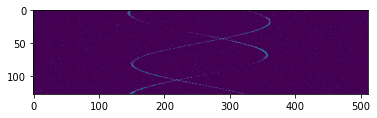

Data for 484ca4d8569f3949d56666a9c16664edbc0a14fe/Ximg:
(128, 512)


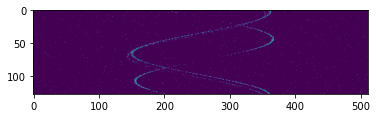

Data for 4903281b12845b1355d711ee431bb78ba4a4c0ec/Ximg:
(128, 512)


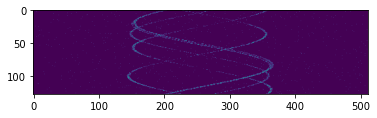

Data for 496eba804ca1f2a7f0b5833897d1506513bd79de/Ximg:
(128, 512)


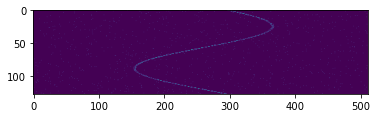

Data for 4edaaebb79c6e6619b8fb31669970878b8749e97/Ximg:
(128, 512)


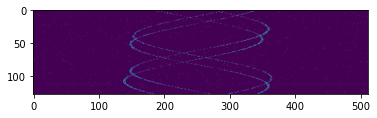

Data for 526b668e5b3215ce2f0cc49749b474d3ae50c1a7/Ximg:
(128, 512)


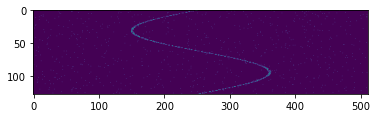

Data for 52d116f3c9eacc1fe19cbafe419f724ada8f4cef/Ximg:
(128, 512)


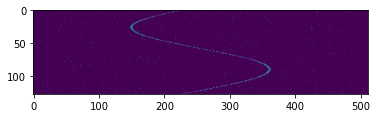

Data for 58ee09b9f526eb0c46fb9b780bca150ea88fa844/Ximg:
(128, 512)


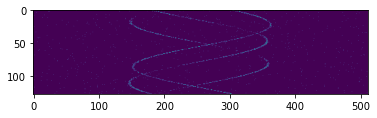

Data for 5aa7033397641468f634fc5b72a5a786ca47e1bf/Ximg:
(128, 512)


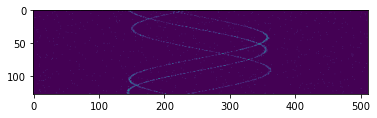

Data for 5b51cec38708e8b35655927a7f415fd9ea93571a/Ximg:
(128, 512)


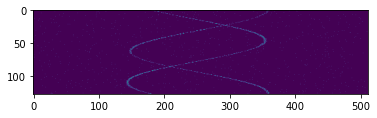

Data for 5c3c51c90be66348fdddcdab44bb098f596f2254/Ximg:
(128, 512)


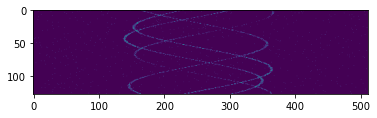

Data for 5d1fc242b662a04c56f8a3282a6130fe25df3d54/Ximg:
(128, 512)


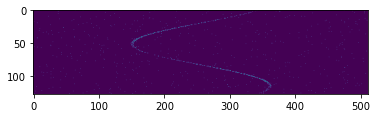

Data for 5d659e34eca5f8e3dcd4d61616e2489ae633dc37/Ximg:
(128, 512)


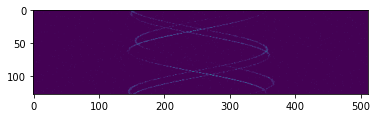

Data for 5dbb3eaf2b70ac05636c8c7ce4d76b47b2d1c156/Ximg:
(128, 512)


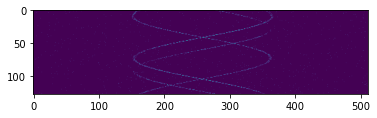

Data for 5e7355a1e95b3d98a7a02a73e693fc2cc2fc6133/Ximg:
(128, 512)


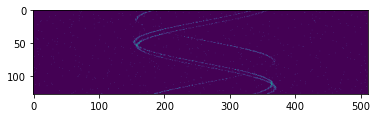

Data for 5e8cc0fa604fcec1a75fef04397a06d520992d89/Ximg:
(128, 512)


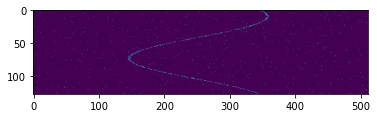

Data for 65eab16dc828f18af7a90fc2736c5af0acb6bff2/Ximg:
(128, 512)


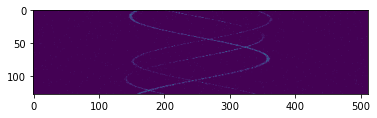

Data for 6b7a5d9c9bf0ecd152b81364f03465790d521f5e/Ximg:
(128, 512)


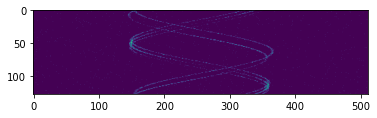

Data for 6c3ba2b19bd8b033f766b1902b720267e09a1d2b/Ximg:
(128, 512)


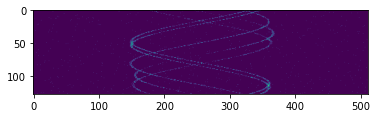

Data for 6cba9a27d7653618de42fa617794d602de150cd0/Ximg:
(128, 512)


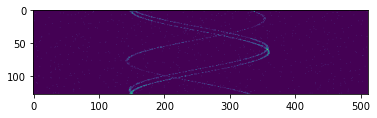

Data for 7adefb1f74aa63b141195f9aab0e95a2493ca473/Ximg:
(128, 512)


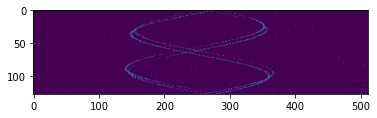

Data for 7f7de4b26e64aaa6f0ce7b6728d5a7fe53845feb/Ximg:
(128, 512)


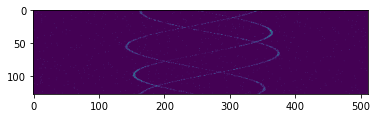

Data for 805e8a819386c67fa9136c123589de628a261a8c/Ximg:
(128, 512)


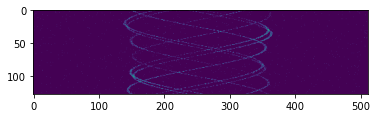

Data for 83b78bcfa536bf9db331255c08b39a82c64ab660/Ximg:
(128, 512)


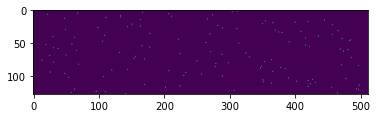

Data for 84b44c10c4ebe74988af30df1a6a775b237ead93/Ximg:
(128, 512)


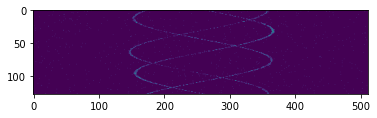

Data for 86cb3251b54efbf79498000ce2ecac2a1f8403d2/Ximg:
(128, 512)


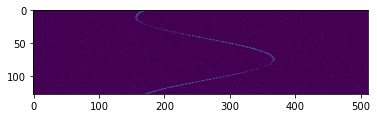

Data for 88fa5d90d0f4da0327fd8161b5d5b0cd9d751c32/Ximg:
(128, 512)


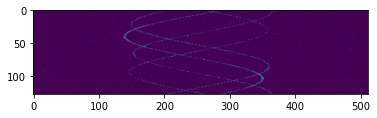

Data for 8af06276204378afb28146bb7acbe8eb77bbd391/Ximg:
(128, 512)


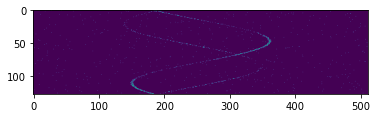

Data for 8fe3a7ed4cdca42f042bf80a43a9ac02f728b217/Ximg:
(128, 512)


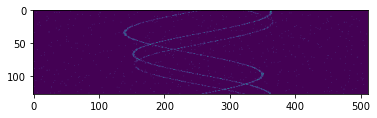

Data for 92272fa264f0b6b3530699b0ce7724cf4d8ce61c/Ximg:
(128, 512)


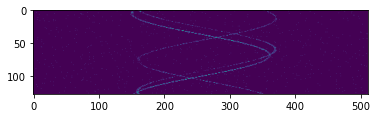

Data for 9373305dfcbd59fe4be2d7356c12ab156b860a3e/Ximg:
(128, 512)


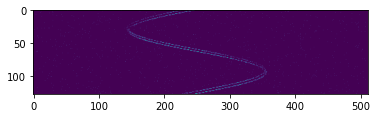

Data for 96357bd04b06b7b9c461969690bd7ce8e968cbea/Ximg:
(128, 512)


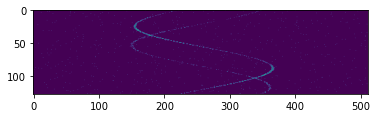

Data for 97a3fa030a144e9fc771b110ba72a99495eb9f0d/Ximg:
(128, 512)


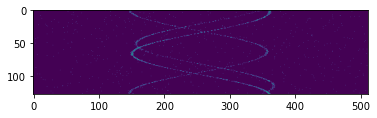

Data for 97c9da23cea2301be6ccd891b0b3389c0f3c17aa/Ximg:
(128, 512)


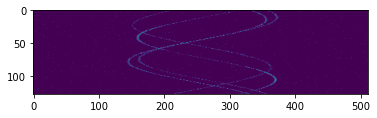

Data for a3660854561b9b205c2b5e5a77638f2d5716ef58/Ximg:
(128, 512)


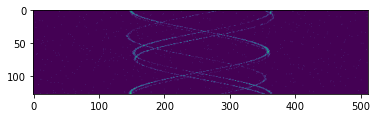

Data for a7a30f57cf979ae5d49e86780a1abf88ecd3650e/Ximg:
(128, 512)


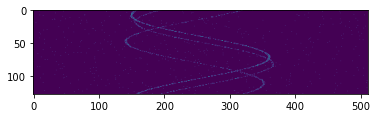

Data for a7a32ec2800272921729b2f3efac354ae13e26d3/Ximg:
(128, 512)


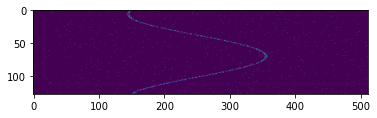

Data for a7a786b6b8e5bad160b48d815168fdefbbe43fbc/Ximg:
(128, 512)


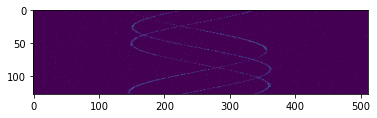

Data for a96e7eec2bca52c8ffc38cb9e41b630748f2f739/Ximg:
(128, 512)


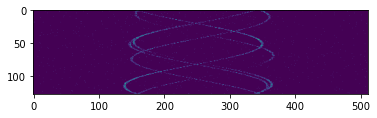

Data for aad9df5ff14a804dc32fd703262f98fd4e53e9cb/Ximg:
(128, 512)


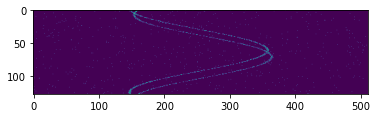

Data for b16212708f2bfba8fb7dd904cd00991bee7f203f/Ximg:
(128, 512)


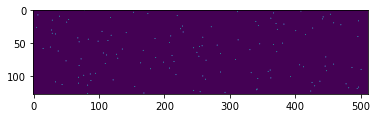

Data for b2d1f7db13944872b75fb0579283349abcb17d98/Ximg:
(128, 512)


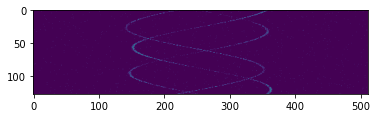

Data for b5103b4bf5843d6a473792d2f9258f95c119bd38/Ximg:
(128, 512)


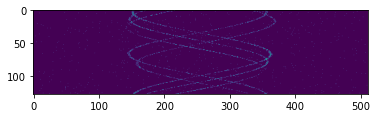

Data for b536d73b4f92189bfe62e2b88414212b233fe795/Ximg:
(128, 512)


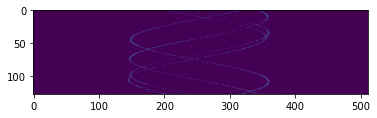

Data for b5b528203aad86b06c75d97aee91329daf168258/Ximg:
(128, 512)


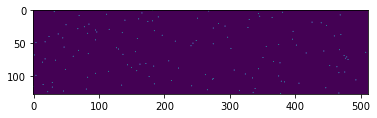

Data for b7b9dcbea956a38ed9d6fdf9237e66f1c80e968f/Ximg:
(128, 512)


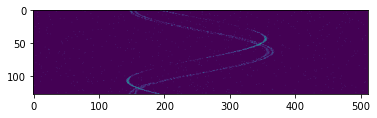

Data for b8c276ec716b9130c34665afc946375d13be371f/Ximg:
(128, 512)


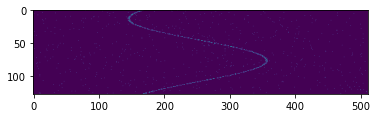

Data for b99a41533479659950cdc40f19ac40783a97c9c4/Ximg:
(128, 512)


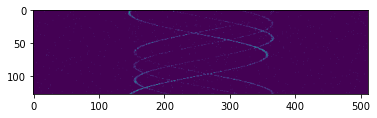

Data for bc0875fb2f94b2021e8900c97118edb3b793f924/Ximg:
(128, 512)


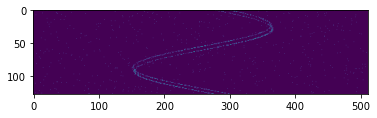

Data for c23a0cf1590788629e2fadc488472789d1c9c6cc/Ximg:
(128, 512)


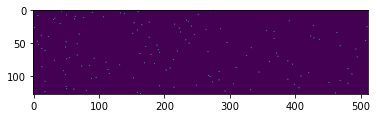

Data for c3e946f6cfb00f7e06a557f1b93cec01dc4cec23/Ximg:
(128, 512)


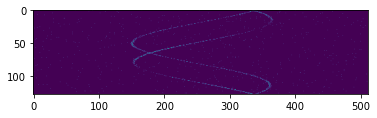

Data for cca4fef1b3de8368cd848265e4f4ae1f5ca6d5d2/Ximg:
(128, 512)


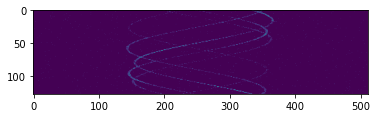

Data for d1c2bf578024615a7d7372a9fa32022131cde9a0/Ximg:
(128, 512)


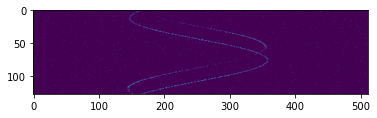

Data for d42585be5febc1b22dc773a55010d23d931fb860/Ximg:
(128, 512)


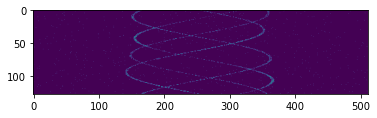

Data for d463b1c2627cb24d7dc607b3b7e2ee4375c86e2a/Ximg:
(128, 512)


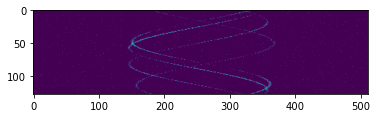

Data for d57939db766d7da2ecd3bef75fdf7f5d6e1f3ef1/Ximg:
(128, 512)


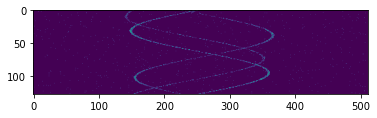

Data for dd6709b0c80d4723a5d0ff7b1bc4770344b42bb0/Ximg:
(128, 512)


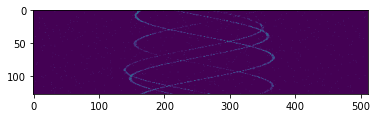

Data for df3f5e0327918927543eb0b15d077c752efa0444/Ximg:
(128, 512)


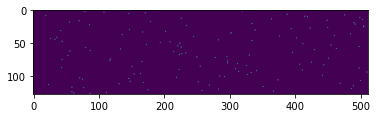

Data for df9cc72e15e97d946d811c73b4a8b091bc8a1d10/Ximg:
(128, 512)


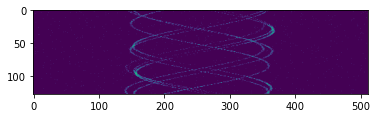

Data for e08e9c5837a7ec4c86d53072def8234da776d72f/Ximg:
(128, 512)


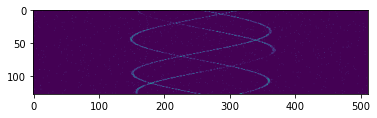

Data for e0bc287e3c61d11025af08ce000248f189222d81/Ximg:
(128, 512)


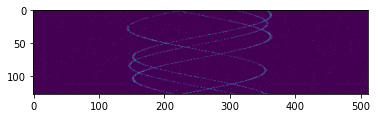

Data for e21ad34e8a3cd527032e97c5b6993e46aa977339/Ximg:
(128, 512)


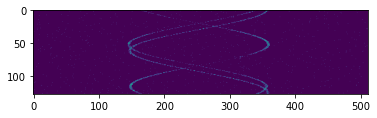

Data for e49acc130f54c6a573cb9842a4319b9b23d3411c/Ximg:
(128, 512)


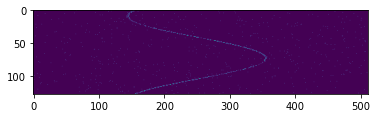

Data for e64643bf45cc21765cbaed351b46fe91162f7aa0/Ximg:
(128, 512)


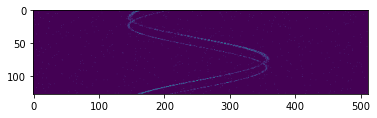

Data for ea90f89fac94035d42c16991e56b700c4e47cc72/Ximg:
(128, 512)


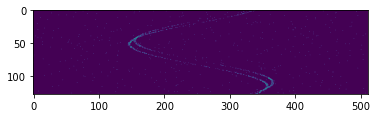

Data for eabb3ce206bfa552f523df4495b9958b8d2732d3/Ximg:
(128, 512)


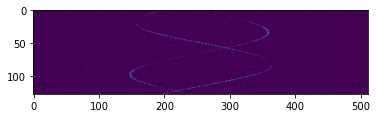

Data for ead7306309bccc2337579cbe28994667f0dfb9e6/Ximg:
(128, 512)


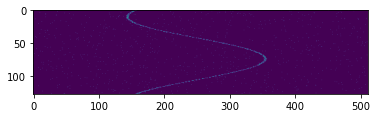

Data for ed216079ca5bc7aa10493c1c2d13b099b306bf9f/Ximg:
(128, 512)


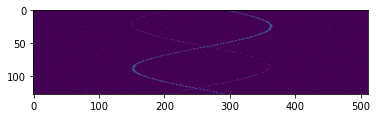

Data for f2d062f99014f6f8a3d2abc71d439dd39e510d0f/Ximg:
(128, 512)


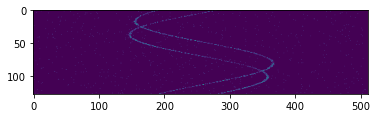

Data for f56c626a2e68e50900a1f24397199fa0594d83d5/Ximg:
(128, 512)


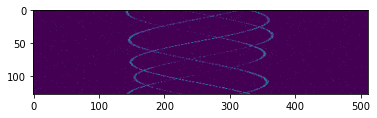

Data for f6aaf9cad69c7df6d46818fa649cb8ff0b3a9619/Ximg:
(128, 512)


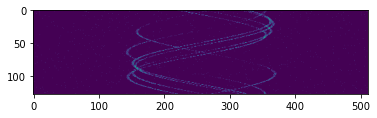

Data for f786b7bf478c58afdb1c344610d1a3e40dc5c7cb/Ximg:
(128, 512)


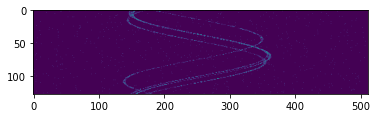

Data for f7995032cda86903a0987667c848baf81dc094fd/Ximg:
(128, 512)


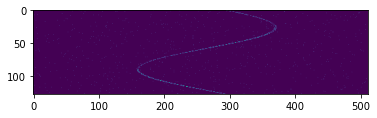

Data for f9d36c775f7aa802ae0446676dc7ba53cde371a9/Ximg:
(128, 512)


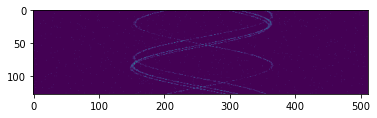

Data for fa6cdac15ba4b25c481a5c46190536b15f8ea80e/Ximg:
(128, 512)


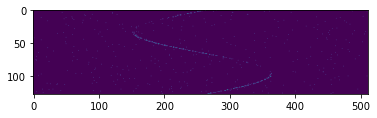

Data for fbcda3b5f2d0b75ee8546eef3f73590757b25d3e/Ximg:
(128, 512)


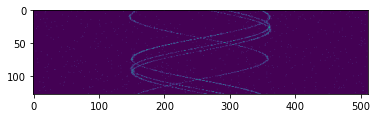

Data for fd3134795f098b5ba0c80d7e5381e320a563aeac/Ximg:
(128, 512)


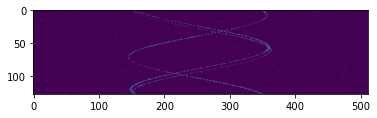

Data for 03a5eadf92cbcd9be66c609fb2e494fd3659a88d/Ypdf:
(128, 512)


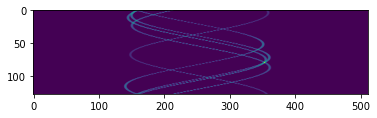

Data for 081b984ad3ea7dd0ca89059279e4eadc06647607/Ypdf:
(128, 512)


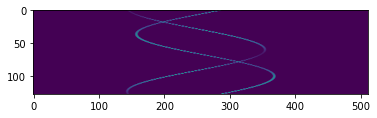

Data for 0d240df382fef7a5c4e029680c60c5b0fd6c4a2c/Ypdf:
(128, 512)


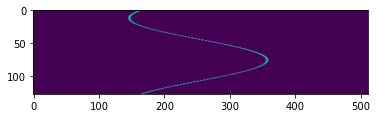

Data for 10b6590e6ae05609d007fa506ee32a6023257921/Ypdf:
(128, 512)


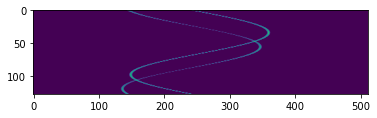

Data for 111623c24c807284ba5728c7b595be149ddc56f4/Ypdf:
(128, 512)


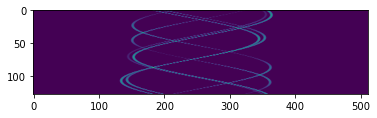

Data for 1443fe24a0519d2a84bf9530f1b1b3480427cfc1/Ypdf:
(128, 512)


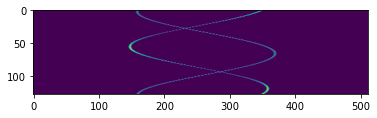

Data for 155bc016ac535aa84e208be670582a889c3cf334/Ypdf:
(128, 512)


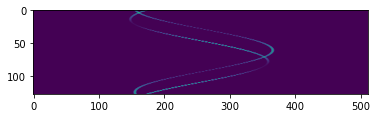

Data for 1568161ea08d0963a15e225d07270a7ed83980ce/Ypdf:
(128, 512)


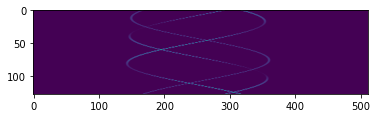

Data for 163f02ac3064645c75c1ae82be978f03566b104c/Ypdf:
(128, 512)


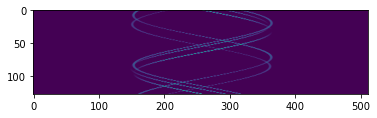

Data for 190104734b0bb388f29e234796e644e835d585e8/Ypdf:
(128, 512)


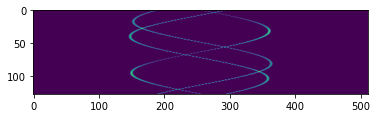

Data for 1cc039fdc47f6b9a6818938de78ad96c11f55c27/Ypdf:
(128, 512)


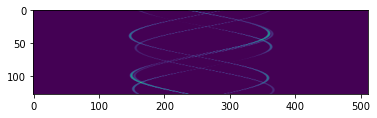

Data for 20af6be2f6ff005f57cb4e383283fdaaed2500d9/Ypdf:
(128, 512)


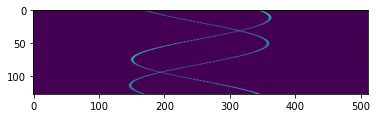

Data for 23a808b9fdf430749ddc6fe57ebda2f8b69117b3/Ypdf:
(128, 512)


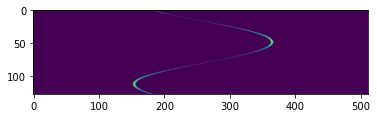

Data for 240331247294e079df72566b8ae89446e7043c5d/Ypdf:
(128, 512)


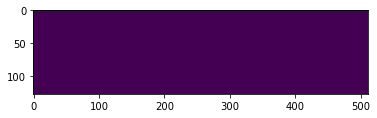

Data for 29ceaf473a8a6d3aae2d275bb4f56c5e9c2833d2/Ypdf:
(128, 512)


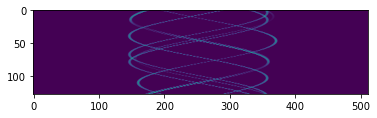

Data for 2baa987d74ef1a402f97b2cabcc9923cf8282e8f/Ypdf:
(128, 512)


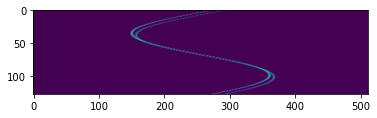

Data for 2f82249f2429339b29282206217fd1a441916626/Ypdf:
(128, 512)


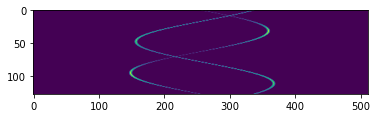

Data for 3061dc332086508f3ad75bb94a40ff7f8020f295/Ypdf:
(128, 512)


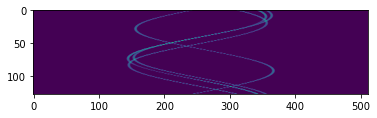

Data for 30d7d612600534ef1f06987e2f5156bd9934d6ce/Ypdf:
(128, 512)


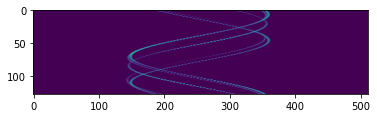

Data for 39794cf0d9d6958aa48b324118a6c9d74a4d5c53/Ypdf:
(128, 512)


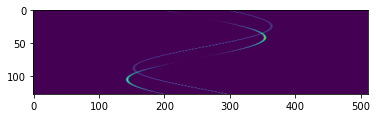

Data for 3c64548238ad76a00106347be0c835a0aec10cd4/Ypdf:
(128, 512)


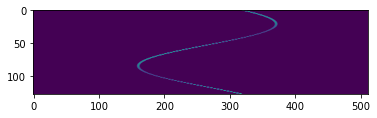

Data for 3e08c1244f726a2d32f17992e9f63b027e38a1b1/Ypdf:
(128, 512)


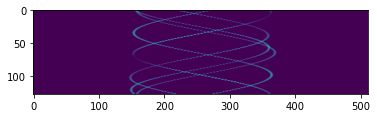

Data for 41a06bba747c13439d0288df1e3420fe6985ecb2/Ypdf:
(128, 512)


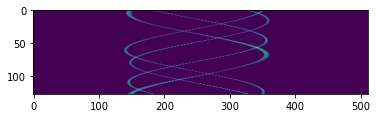

Data for 469904243d8e2d2fd3b486fa56f5f2bc973fa678/Ypdf:
(128, 512)


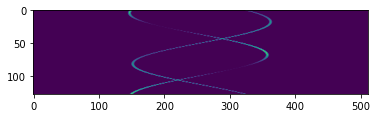

Data for 484ca4d8569f3949d56666a9c16664edbc0a14fe/Ypdf:
(128, 512)


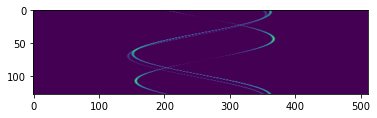

Data for 4903281b12845b1355d711ee431bb78ba4a4c0ec/Ypdf:
(128, 512)


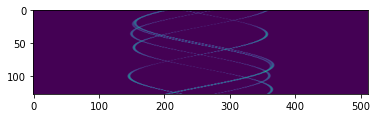

Data for 496eba804ca1f2a7f0b5833897d1506513bd79de/Ypdf:
(128, 512)


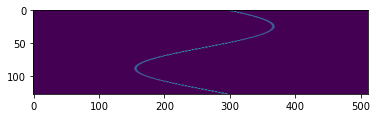

Data for 4edaaebb79c6e6619b8fb31669970878b8749e97/Ypdf:
(128, 512)


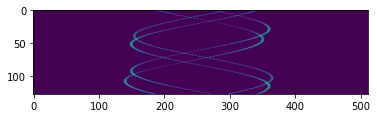

Data for 526b668e5b3215ce2f0cc49749b474d3ae50c1a7/Ypdf:
(128, 512)


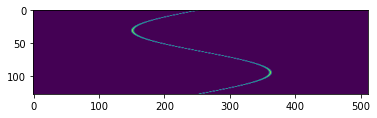

Data for 52d116f3c9eacc1fe19cbafe419f724ada8f4cef/Ypdf:
(128, 512)


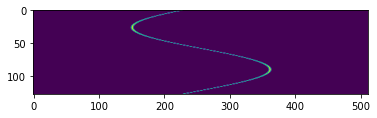

Data for 58ee09b9f526eb0c46fb9b780bca150ea88fa844/Ypdf:
(128, 512)


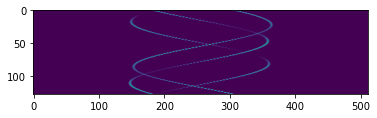

Data for 5aa7033397641468f634fc5b72a5a786ca47e1bf/Ypdf:
(128, 512)


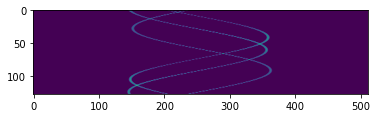

Data for 5b51cec38708e8b35655927a7f415fd9ea93571a/Ypdf:
(128, 512)


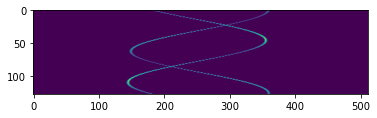

Data for 5c3c51c90be66348fdddcdab44bb098f596f2254/Ypdf:
(128, 512)


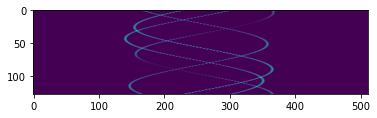

Data for 5d1fc242b662a04c56f8a3282a6130fe25df3d54/Ypdf:
(128, 512)


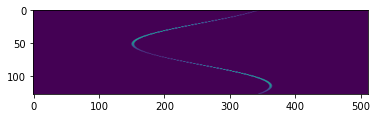

Data for 5d659e34eca5f8e3dcd4d61616e2489ae633dc37/Ypdf:
(128, 512)


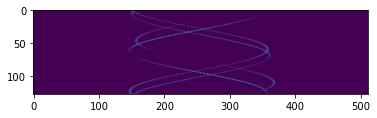

Data for 5dbb3eaf2b70ac05636c8c7ce4d76b47b2d1c156/Ypdf:
(128, 512)


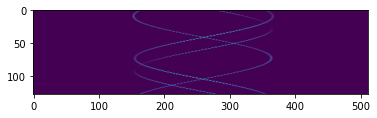

Data for 5e7355a1e95b3d98a7a02a73e693fc2cc2fc6133/Ypdf:
(128, 512)


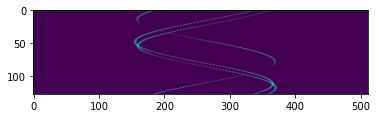

Data for 5e8cc0fa604fcec1a75fef04397a06d520992d89/Ypdf:
(128, 512)


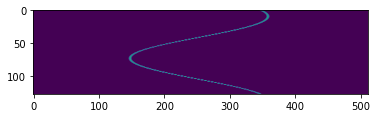

Data for 65eab16dc828f18af7a90fc2736c5af0acb6bff2/Ypdf:
(128, 512)


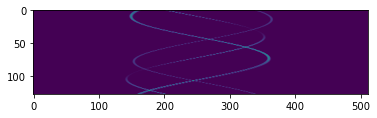

Data for 6b7a5d9c9bf0ecd152b81364f03465790d521f5e/Ypdf:
(128, 512)


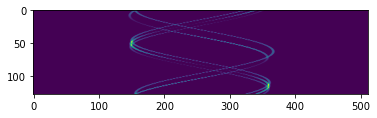

Data for 6c3ba2b19bd8b033f766b1902b720267e09a1d2b/Ypdf:
(128, 512)


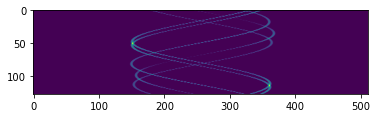

Data for 6cba9a27d7653618de42fa617794d602de150cd0/Ypdf:
(128, 512)


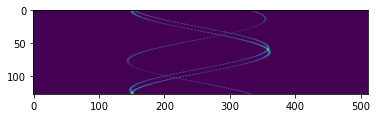

Data for 7adefb1f74aa63b141195f9aab0e95a2493ca473/Ypdf:
(128, 512)


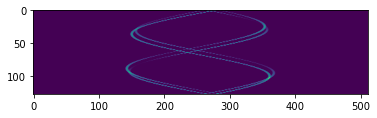

Data for 7f7de4b26e64aaa6f0ce7b6728d5a7fe53845feb/Ypdf:
(128, 512)


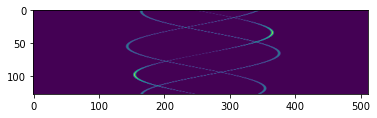

Data for 805e8a819386c67fa9136c123589de628a261a8c/Ypdf:
(128, 512)


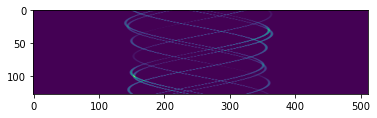

Data for 83b78bcfa536bf9db331255c08b39a82c64ab660/Ypdf:
(128, 512)


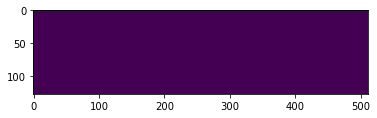

Data for 84b44c10c4ebe74988af30df1a6a775b237ead93/Ypdf:
(128, 512)


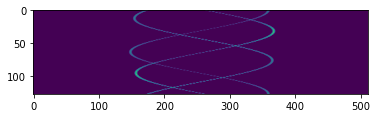

Data for 86cb3251b54efbf79498000ce2ecac2a1f8403d2/Ypdf:
(128, 512)


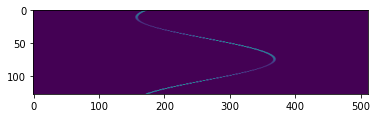

Data for 88fa5d90d0f4da0327fd8161b5d5b0cd9d751c32/Ypdf:
(128, 512)


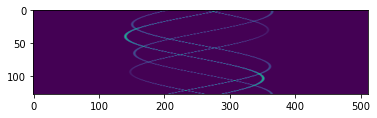

Data for 8af06276204378afb28146bb7acbe8eb77bbd391/Ypdf:
(128, 512)


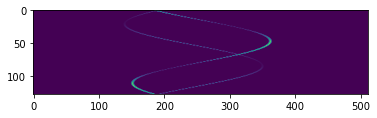

Data for 8fe3a7ed4cdca42f042bf80a43a9ac02f728b217/Ypdf:
(128, 512)


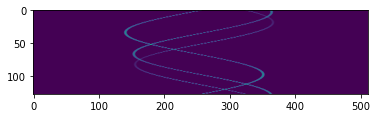

Data for 92272fa264f0b6b3530699b0ce7724cf4d8ce61c/Ypdf:
(128, 512)


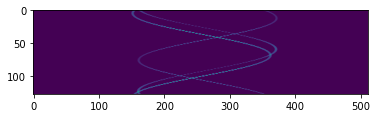

Data for 9373305dfcbd59fe4be2d7356c12ab156b860a3e/Ypdf:
(128, 512)


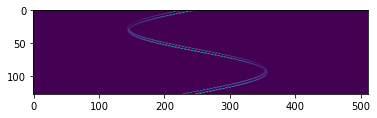

Data for 96357bd04b06b7b9c461969690bd7ce8e968cbea/Ypdf:
(128, 512)


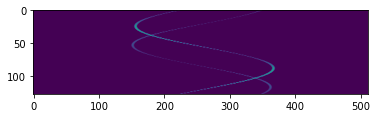

Data for 97a3fa030a144e9fc771b110ba72a99495eb9f0d/Ypdf:
(128, 512)


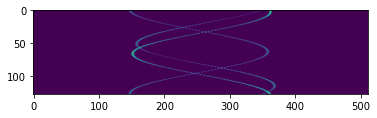

Data for 97c9da23cea2301be6ccd891b0b3389c0f3c17aa/Ypdf:
(128, 512)


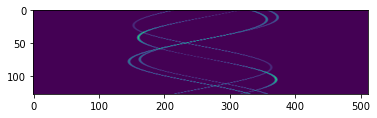

Data for a3660854561b9b205c2b5e5a77638f2d5716ef58/Ypdf:
(128, 512)


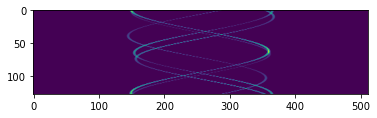

Data for a7a30f57cf979ae5d49e86780a1abf88ecd3650e/Ypdf:
(128, 512)


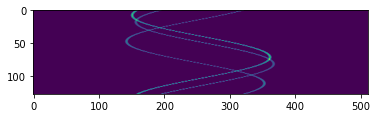

Data for a7a32ec2800272921729b2f3efac354ae13e26d3/Ypdf:
(128, 512)


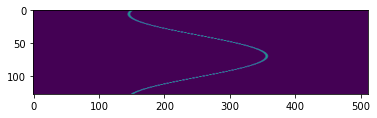

Data for a7a786b6b8e5bad160b48d815168fdefbbe43fbc/Ypdf:
(128, 512)


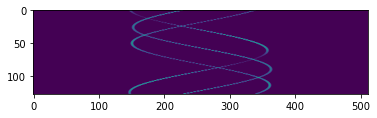

Data for a96e7eec2bca52c8ffc38cb9e41b630748f2f739/Ypdf:
(128, 512)


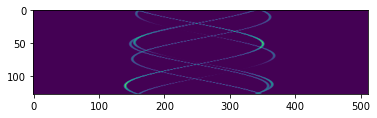

Data for aad9df5ff14a804dc32fd703262f98fd4e53e9cb/Ypdf:
(128, 512)


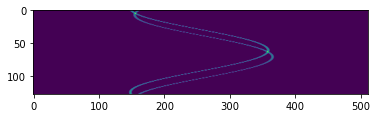

Data for b16212708f2bfba8fb7dd904cd00991bee7f203f/Ypdf:
(128, 512)


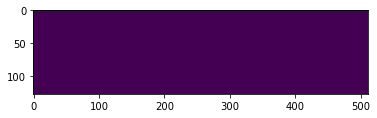

Data for b2d1f7db13944872b75fb0579283349abcb17d98/Ypdf:
(128, 512)


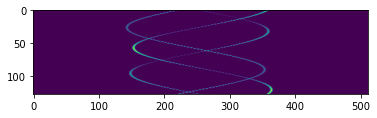

Data for b5103b4bf5843d6a473792d2f9258f95c119bd38/Ypdf:
(128, 512)


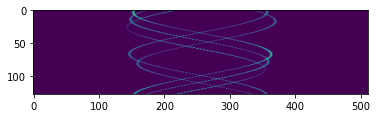

Data for b536d73b4f92189bfe62e2b88414212b233fe795/Ypdf:
(128, 512)


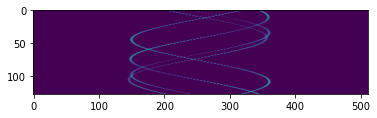

Data for b5b528203aad86b06c75d97aee91329daf168258/Ypdf:
(128, 512)


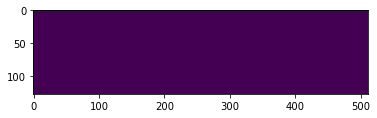

Data for b7b9dcbea956a38ed9d6fdf9237e66f1c80e968f/Ypdf:
(128, 512)


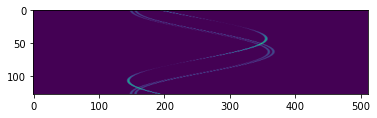

Data for b8c276ec716b9130c34665afc946375d13be371f/Ypdf:
(128, 512)


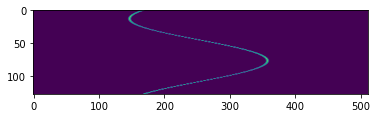

Data for b99a41533479659950cdc40f19ac40783a97c9c4/Ypdf:
(128, 512)


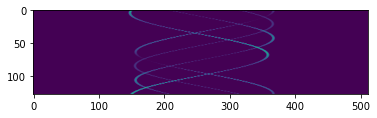

Data for bc0875fb2f94b2021e8900c97118edb3b793f924/Ypdf:
(128, 512)


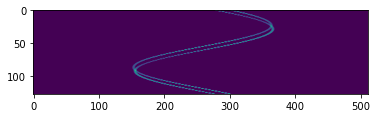

Data for c23a0cf1590788629e2fadc488472789d1c9c6cc/Ypdf:
(128, 512)


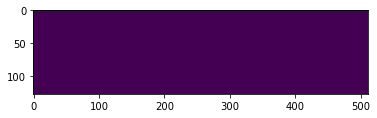

Data for c3e946f6cfb00f7e06a557f1b93cec01dc4cec23/Ypdf:
(128, 512)


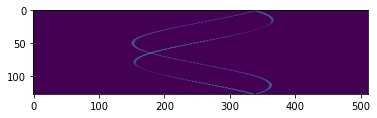

Data for cca4fef1b3de8368cd848265e4f4ae1f5ca6d5d2/Ypdf:
(128, 512)


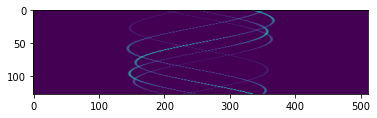

Data for d1c2bf578024615a7d7372a9fa32022131cde9a0/Ypdf:
(128, 512)


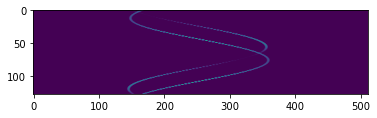

Data for d42585be5febc1b22dc773a55010d23d931fb860/Ypdf:
(128, 512)


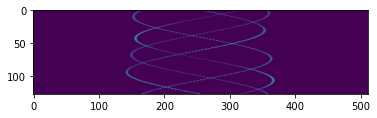

Data for d463b1c2627cb24d7dc607b3b7e2ee4375c86e2a/Ypdf:
(128, 512)


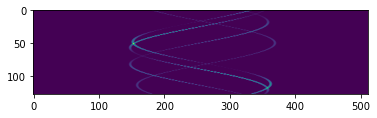

Data for d57939db766d7da2ecd3bef75fdf7f5d6e1f3ef1/Ypdf:
(128, 512)


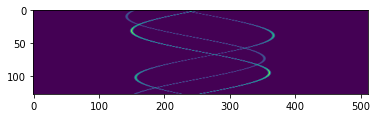

Data for dd6709b0c80d4723a5d0ff7b1bc4770344b42bb0/Ypdf:
(128, 512)


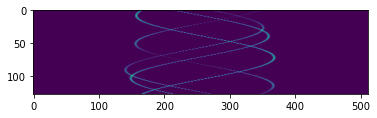

Data for df3f5e0327918927543eb0b15d077c752efa0444/Ypdf:
(128, 512)


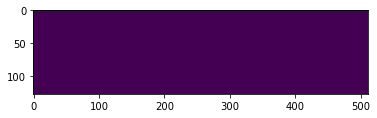

Data for df9cc72e15e97d946d811c73b4a8b091bc8a1d10/Ypdf:
(128, 512)


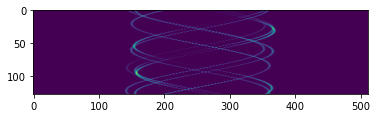

Data for e08e9c5837a7ec4c86d53072def8234da776d72f/Ypdf:
(128, 512)


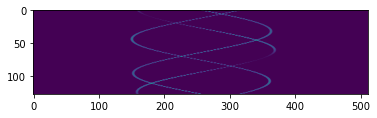

Data for e0bc287e3c61d11025af08ce000248f189222d81/Ypdf:
(128, 512)


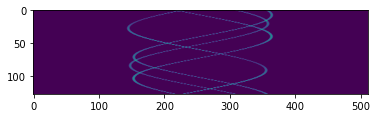

Data for e21ad34e8a3cd527032e97c5b6993e46aa977339/Ypdf:
(128, 512)


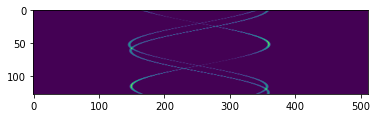

Data for e49acc130f54c6a573cb9842a4319b9b23d3411c/Ypdf:
(128, 512)


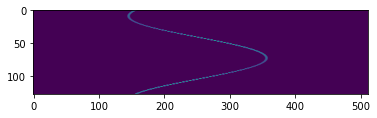

Data for e64643bf45cc21765cbaed351b46fe91162f7aa0/Ypdf:
(128, 512)


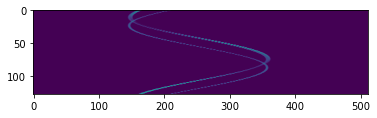

Data for ea90f89fac94035d42c16991e56b700c4e47cc72/Ypdf:
(128, 512)


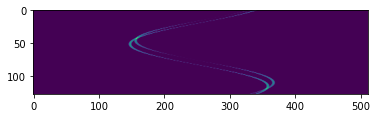

Data for eabb3ce206bfa552f523df4495b9958b8d2732d3/Ypdf:
(128, 512)


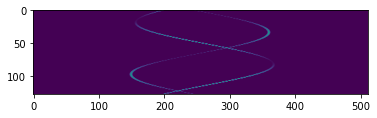

Data for ead7306309bccc2337579cbe28994667f0dfb9e6/Ypdf:
(128, 512)


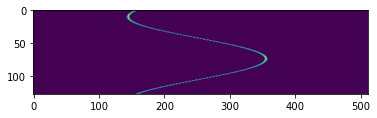

Data for ed216079ca5bc7aa10493c1c2d13b099b306bf9f/Ypdf:
(128, 512)


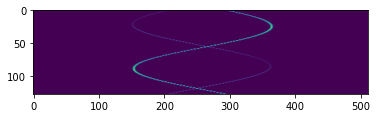

Data for f2d062f99014f6f8a3d2abc71d439dd39e510d0f/Ypdf:
(128, 512)


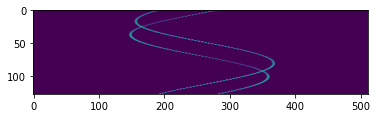

Data for f56c626a2e68e50900a1f24397199fa0594d83d5/Ypdf:
(128, 512)


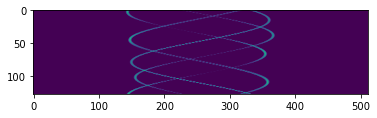

Data for f6aaf9cad69c7df6d46818fa649cb8ff0b3a9619/Ypdf:
(128, 512)


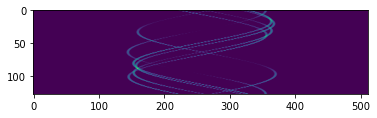

Data for f786b7bf478c58afdb1c344610d1a3e40dc5c7cb/Ypdf:
(128, 512)


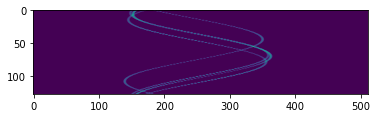

Data for f7995032cda86903a0987667c848baf81dc094fd/Ypdf:
(128, 512)


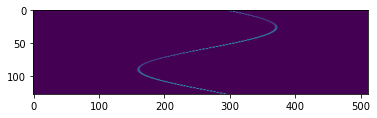

Data for f9d36c775f7aa802ae0446676dc7ba53cde371a9/Ypdf:
(128, 512)


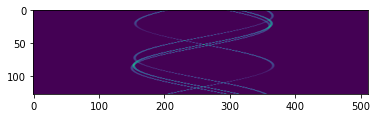

Data for fa6cdac15ba4b25c481a5c46190536b15f8ea80e/Ypdf:
(128, 512)


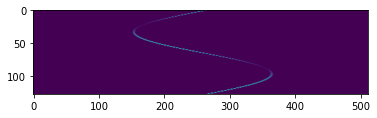

Data for fbcda3b5f2d0b75ee8546eef3f73590757b25d3e/Ypdf:
(128, 512)


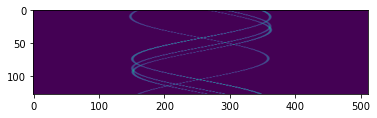

Data for fd3134795f098b5ba0c80d7e5381e320a563aeac/Ypdf:
(128, 512)


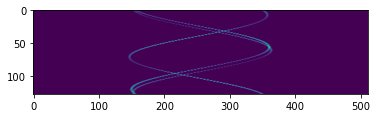

In [118]:
import h5py
import matplotlib.pyplot as plt

def get_all_keys(h5group):
    keys = []
    def func(name):
        keys.append(name)
    h5group.visit(func)
    return keys

def process_ypdf_data(file_path, pattern):
    with h5py.File(file_path, 'r') as h5file:
        # Replace '0ab1a533bf0038f4ad3a16ffafcaa818a7f551e7/Ypdf' with the actual path to your dataset
        dataset_pattern = pattern
        file_keys = get_all_keys(h5file)
        
        # Create a list of keys matching the pattern
        keys_with_ypdf = [key for key in file_keys if key.endswith(dataset_pattern)]
        
        # Iterate through the keys
        for key in keys_with_ypdf:
            print(f"Data for {key}:")
            
            # Access the data associated with the 'Ypdf' dataset
            ypdf_data = h5file[key][:]
            print(ypdf_data.shape)
            
            # Plot the data
            plt.imshow(ypdf_data)
            plt.show()

process_ypdf_data(file_path, 'Ximg')
process_ypdf_data(file_path, 'Ypdf')


In [7]:
import h5py
import numpy as np

def get_all_keys(h5group):
    keys = []
    def func(name):
        keys.append(name)
    h5group.visit(func)
    return keys

def process_ypdf_data(file_path, pattern):
    with h5py.File(file_path, 'r') as h5file:
        # Replace '/Ypdf' with the actual path to your dataset
        dataset_pattern = pattern
        file_keys = get_all_keys(h5file)
        
        # Create a list to store Ypdf data
        ypdf_data_list = []

        # Iterate through the keys
        for key in file_keys:
            if key.endswith(dataset_pattern):
                #print(f"Data for {key}:")
                
                # Access the data associated with the 'Ypdf' dataset
                ypdf_data = h5file[key][:]
                #print(ypdf_data.shape)
                
                # Append the data to the list
                ypdf_data_list.append(ypdf_data)

        
        # Print the shape of the resulting array
        
        return ypdf_data_list

        # You can now use ypdf_data_array for further processing

pdfarray = process_ypdf_data(file_path, 'Ypdf')
ximgarray = process_ypdf_data(file_path, 'Ximg')

pdfarray1 = process_ypdf_data(file_path1, 'Ypdf')
ximgarray1 = process_ypdf_data(file_path1, 'Ximg')


Data for 03a5eadf92cbcd9be66c609fb2e494fd3659a88d/Ypdf:
(128, 512)
Data for 081b984ad3ea7dd0ca89059279e4eadc06647607/Ypdf:
(128, 512)
Data for 0d240df382fef7a5c4e029680c60c5b0fd6c4a2c/Ypdf:
(128, 512)
Data for 10b6590e6ae05609d007fa506ee32a6023257921/Ypdf:
(128, 512)
Data for 111623c24c807284ba5728c7b595be149ddc56f4/Ypdf:
(128, 512)
Data for 1443fe24a0519d2a84bf9530f1b1b3480427cfc1/Ypdf:
(128, 512)
Data for 155bc016ac535aa84e208be670582a889c3cf334/Ypdf:
(128, 512)
Data for 1568161ea08d0963a15e225d07270a7ed83980ce/Ypdf:
(128, 512)
Data for 163f02ac3064645c75c1ae82be978f03566b104c/Ypdf:
(128, 512)
Data for 190104734b0bb388f29e234796e644e835d585e8/Ypdf:
(128, 512)
Data for 1cc039fdc47f6b9a6818938de78ad96c11f55c27/Ypdf:
(128, 512)
Data for 20af6be2f6ff005f57cb4e383283fdaaed2500d9/Ypdf:
(128, 512)
Data for 23a808b9fdf430749ddc6fe57ebda2f8b69117b3/Ypdf:
(128, 512)
Data for 240331247294e079df72566b8ae89446e7043c5d/Ypdf:
(128, 512)
Data for 29ceaf473a8a6d3aae2d275bb4f56c5e9c2833d2/Ypdf:
(128, 

(128, 512)
Data for 6d4568ca8fe23c726c55c0b4572c9bf0dece39e6/Ypdf:
(128, 512)
Data for 6ea83b67112b5dfcfeec3690b7ece0a85d706102/Ypdf:
(128, 512)
Data for 6eb3648bc573cdc335d661ad3df45fd58b307285/Ypdf:
(128, 512)
Data for 73e83c12f543ac9d385ce5455fe6eb386fa11abf/Ypdf:
(128, 512)
Data for 7437ff49605df959c8b65865b8158737be532a66/Ypdf:
(128, 512)
Data for 79521b9c9c3060d5a19032851e20dc985ece3a1b/Ypdf:
(128, 512)
Data for 7aceb5fb0801419e034b1f71576ca9bedfade059/Ypdf:
(128, 512)
Data for 7d0244df7c9abd0dc18b5ebfad1389caf47cfe6f/Ypdf:
(128, 512)
Data for 7d06453e020c32df0841d5c69593684305079449/Ypdf:
(128, 512)
Data for 7f30747ba87717f1ccc1f54270456ebe7baa45e9/Ypdf:
(128, 512)
Data for 84c73a74acd8a99153fe01b309d34a1efdc98350/Ypdf:
(128, 512)
Data for 861073ada451edb2b65fc2c9283fe46f67b81280/Ypdf:
(128, 512)
Data for 86784b1672e4238511ddfa40013d838728e99bd5/Ypdf:
(128, 512)
Data for 8745e0ae4c43afa2d412d88b2130093e9954a78c/Ypdf:
(128, 512)
Data for 87fb3bfe4a32d6bbba2b8e1c0d100962c02b31fb/Y

<h1>process all the 15 files

In [62]:
def get_all_keys(h5group):
    keys = []
    def func(name):
        keys.append(name)
    h5group.visit(func)
    return keys

def process_ypdf_data(file_path, pattern):
    with h5py.File(file_path, 'r') as h5file:
        # Replace '/Ypdf' with the actual path to your dataset
        dataset_pattern = pattern
        file_keys = get_all_keys(h5file)
        
        # Create a list to store Ypdf data
        ypdf_data_list = []

        # Iterate through the keys
        for key in file_keys:
            if key.endswith(dataset_pattern):
                #print(f"Data for {key}:")
                
                # Access the data associated with the 'Ypdf' dataset
                ypdf_data = h5file[key][:]
                #print(ypdf_data.shape)
                
                # Append the data to the list
                ypdf_data_list.append(ypdf_data)

        
        # Print the shape of the resulting array
        
        return ypdf_data_list
    
def process_files(file_paths):
    pdf_arrays = []
    ximg_arrays = []

    for file_path in file_paths:
        pdf_array = process_ypdf_data(file_path, 'Ypdf')
        ximg_array = process_ypdf_data(file_path, 'Ximg')

        pdf_arrays.append(pdf_array)
        ximg_arrays.append(ximg_array)

    return pdf_arrays, ximg_arrays

# Example usage with 15 file paths
file_paths = [
    file_path,  
    file_path1 ,
    file_path2 ,
    file_path3 ,
    file_path4 ,
    file_path5 ,
    file_path6 ,
    file_path7 ,
    file_path8 ,
    file_path9 ,
    file_path10,
    file_path11,
    file_path12,
    file_path13,
    file_path14,
    file_path15
]

pdf_arrays, ximg_arrays = process_files(file_paths)

# Access the arrays for each file as needed
print(np.array(pdf_arrays).shape)  # Ypdf data for the first file
print(np.array(ximg_arrays).shape)  # Ximg data for the first file


(16, 100, 128, 512)
(16, 100, 128, 512)


In [65]:
pdfarray = np.array(pdf_arrays)
ximgarray = np.array(ximg_arrays)
print(pdfarray.shape)
print(ximgarray.shape)

pdfarray1 = np.array(pdfarray1)
ximgarray1 = np.array(ximgarray1)
print(pdfarray1.shape)
print(ximgarray1.shape)

(16, 100, 128, 512)
(16, 100, 128, 512)
(100, 128, 512)
(100, 128, 512)


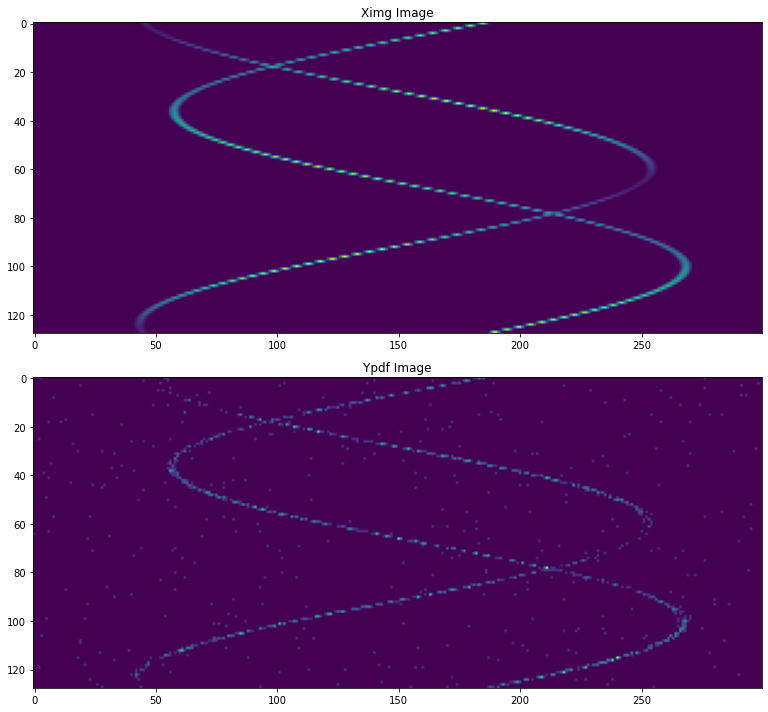

In [66]:
chopped_Image = ximgarray[0,:,:,100:400]
chopped_Ypdf = pdfarray[0,:,:,100:400]
# Create a figure with two subplots side by side
fig, axes = plt.subplots(2, 1, figsize=(12, 10))



# Plot the first image from ximgarray on the right subplot
axes[0].imshow(chopped_Ypdf[1])  # Specify cmap if the image is grayscale
axes[0].set_title('Ximg Image')
axes[0].set_aspect('equal')  # Set equal aspect ratio

# Plot the first image from pdfarray on the left subplot
axes[1].imshow(chopped_Image[1])  # Specify cmap if the image is grayscale
axes[1].set_title('Ypdf Image')
axes[1].set_aspect('equal')  # Set equal aspect ratio

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [86]:
def lower_halve_continuous_img(img, x, y):
    H,W = img.reshape(x,y).shape
    i = deepcopy(img.reshape(x,y))
    i[H//2:H,:] = 0
    return i

def upper_halve_continuous_img(img,x,y):
    H,W = img.reshape(x,y).shape
    i = deepcopy(img.reshape(x,y))
    i[:H//2, :] = 0
    return i

def mask_every_other_column_img(img,x,y):
    H, W = img.reshape(x, y).shape
    i = deepcopy(img.reshape(x, y))
    
    # Mask every other column by setting their values to zero
    i[:, ::2] = 0
    
    return i

def mask_every_other_row_img(img,x,y):
    H, W = img.reshape(x, y).shape
    i = deepcopy(img.reshape(x, y))
    
    # Mask every other row by setting their values to zero
    i[::2, :] = 0
    
    return i

def alternate_mask_4_rows_img(img, x, y):
    H, W = img.reshape(x, y).shape
    i = deepcopy(img.reshape(x, y))
    
    for row_start in range(0, H, 8):
        i[row_start:row_start+4, :] = 0
    
    return i
def alternate_mask_4_column_img(img, x, y):
    H, W = img.reshape(x, y).shape
    i = deepcopy(img.reshape(x, y))
    
    for column_start in range(W, 0, 8):
        i[:, column_start:column_start+4] = 0
    
    return i


def continuous_update_rule(X,z,beta):
    return X.T @ F.softmax(beta * X @ z,dim=0)

def retrieve_store_continuous(train_imgs,test_imgs,Ntrain, Ntest, beta=8,num_plot = 5, TestStyle = 0, x=48, y=64):
    print('beta:', beta)
    Xtrain = train_imgs[0:Ntrain,:]
    Xtest = test_imgs[0:Ntest,:]
    out = []
    mask_image = []
    mask_test_image = []
    for j in range(Ntest):
        if (TestStyle==0):
            z = lower_halve_continuous_img(Xtest[j,:], x, y).reshape(x*y,1)            
        elif(TestStyle==1):
            z = upper_halve_continuous_img(Xtest[j,:], x, y).reshape(x*y,1)           
        elif(TestStyle==2):
            z = mask_every_other_column_img(Xtest[j,:], x, y).reshape(x*y,1)            
        elif (TestStyle==3):
            z = mask_every_other_row_img(Xtest[j,:], x, y).reshape(x*y,1)
        elif (TestStyle==4):
            z = alternate_mask_4_rows_img(Xtest[j,:], x, y).reshape(x*y,1)
        elif (TestStyle==5):
            z = alternate_mask_4_column_img(Xtest[j,:], x, y).reshape(x*y,1)
        mask_image.append(z)
        out.append(continuous_update_rule(Xtrain,z,beta))

    return out, mask_image


In [106]:
storePat = pdfarray[0].reshape(pdfarray[0].shape[0], -1).astype(np.float32) #chopped_Ypdf
#storePat = chopped_Ypdf.reshape(chopped_Ypdf.shape[0], -1).astype(np.float32)
testPat = ximgarray.reshape(ximgarray.shape[0], -1).astype(np.float32)
storePat1 = pdfarray1.reshape(pdfarray1.shape[0], -1).astype(np.float32)
testPat1 = ximgarray[1].reshape(ximgarray[1].shape[0], -1).astype(np.float32)
print('storePat.shape', storePat.shape)
print('testPat.shape', testPat1.shape)
print('max Val Stor Pat:',storePat.min())
beta = 100
hopout_train, maskedTest = retrieve_store_continuous(torch.from_numpy(storePat), #provide store pattern
                              torch.from_numpy(testPat1), #provide patterns to test
                              len(storePat), #No. of store pattern 
                              len(testPat1), #No of test patterns
                              beta, #Beta factor
                              2, #No. of plots
                              4,
                              128, #Image row size
                              512 #Image column size
                            ) 


storePat.shape (100, 65536)
testPat.shape (100, 65536)
max Val Stor Pat: 0.0
beta: 100


 ...]

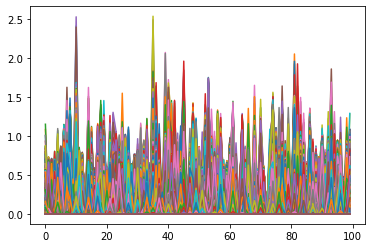

In [88]:
plt.plot(storePat)

In [107]:
stacked_tensor_test = ((torch.stack(hopout_train, dim=0)).numpy()).reshape(len(testPat1),128,512)
stacked_tensor_masked = ((torch.stack(maskedTest, dim=0)).numpy()).reshape(len(testPat1),128,512)

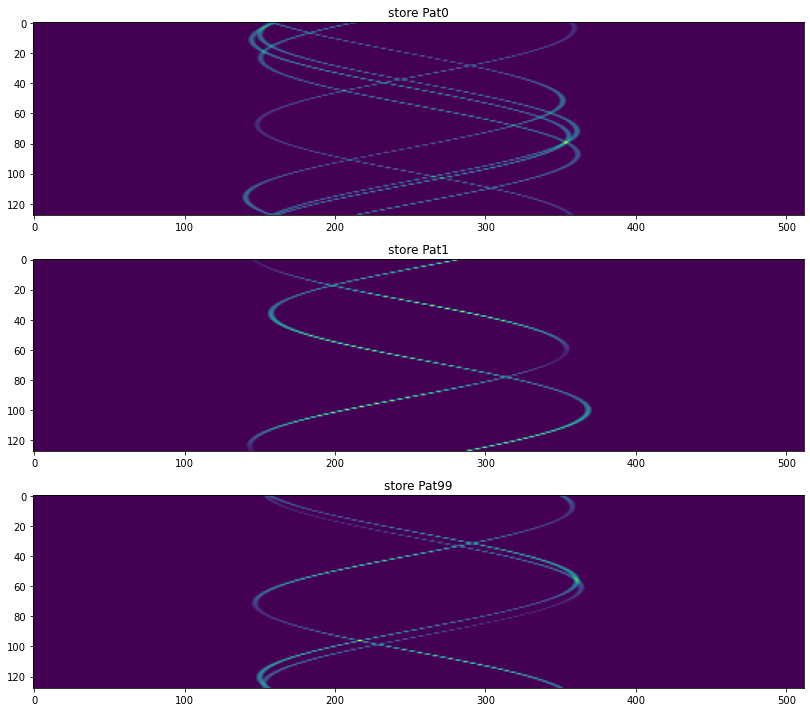

In [108]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(3, 1, figsize=(12, 10))


patNum =0
# Plot the first image from ximgarray on the right subplot
axes[0].imshow(storePat[patNum].reshape(128,512))  # Specify cmap if the image is grayscale
axes[0].set_title('store Pat'+str(patNum))
axes[0].set_aspect('equal')  # Set equal aspect ratio

# Plot the first image from pdfarray on the left subplot
axes[1].imshow(storePat[patNum+1].reshape(128,512))  # Specify cmap if the image is grayscale
axes[1].set_title('store Pat'+str(patNum+1))
axes[1].set_aspect('equal')  # Set equal aspect ratio

# Plot the first image from pdfarray on the left subplot
axes[2].imshow(storePat[patNum+99].reshape(128,512))  # Specify cmap if the image is grayscale
axes[2].set_title('store Pat'+str(patNum+99))
axes[2].set_aspect('equal')  # Set equal aspect ratio

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [109]:
print(stacked_tensor_test.shape)
print(stacked_tensor_masked.shape)

(100, 128, 512)
(100, 128, 512)


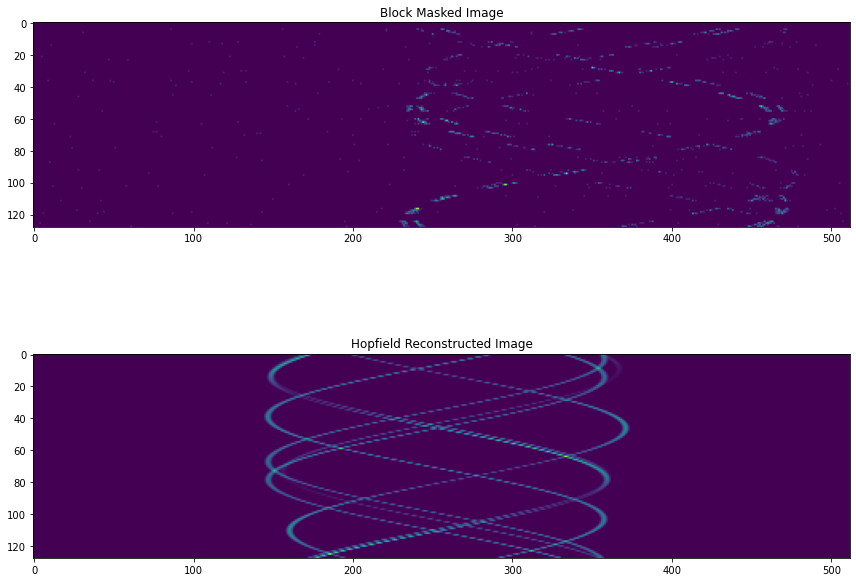

In [120]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(2, 1, figsize=(12, 10))


patNum =1
# Plot the first image from ximgarray on the right subplot
axes[0].imshow(stacked_tensor_masked[patNum])  # Specify cmap if the image is grayscale
axes[0].set_title('Block Masked Image')
axes[0].set_aspect('equal')  # Set equal aspect ratio

# Plot the first image from pdfarray on the left subplot
axes[1].imshow(stacked_tensor_test[patNum])  # Specify cmap if the image is grayscale
axes[1].set_title('Hopfield Reconstructed Image')
axes[1].set_aspect('equal')  # Set equal aspect ratio

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [101]:
print(stacked_tensor_test.shape)
print(pdfarray.shape)

(100, 128, 512)
(16, 100, 128, 512)


In [102]:
# Perform element-wise comparison along the specified axis (axis=1 in this case)
comparison = np.all(stacked_tensor_test == pdfarray[0], axis=(1, 2))

# Count the number of True values in the comparison array for each pattern
equal_counts_per_pattern = np.sum(comparison, axis=0)
print(comparison)
print(f"Count of equal elements for each pattern: {equal_counts_per_pattern}")

[ True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True False  True  True  True  True
 False  True  True  True  True  True  True  True False  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True]
Count of equal elements for each pattern: 91


Pattern 0, False locations: (array([0]),)


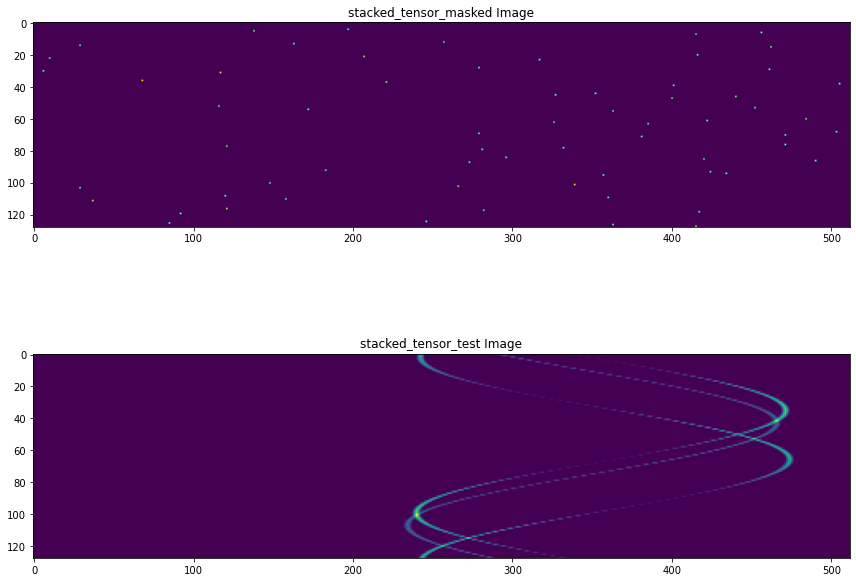

Pattern 25, False locations: (array([0]),)


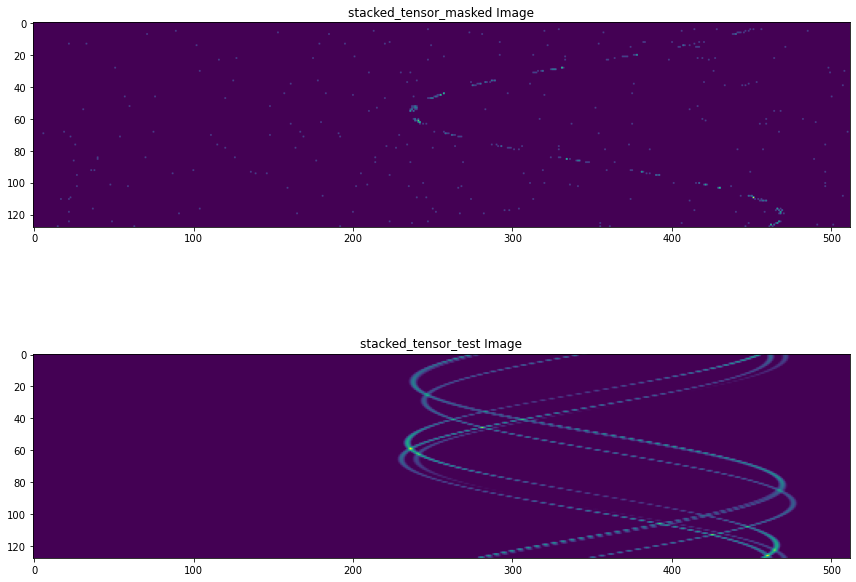

Pattern 35, False locations: (array([0]),)


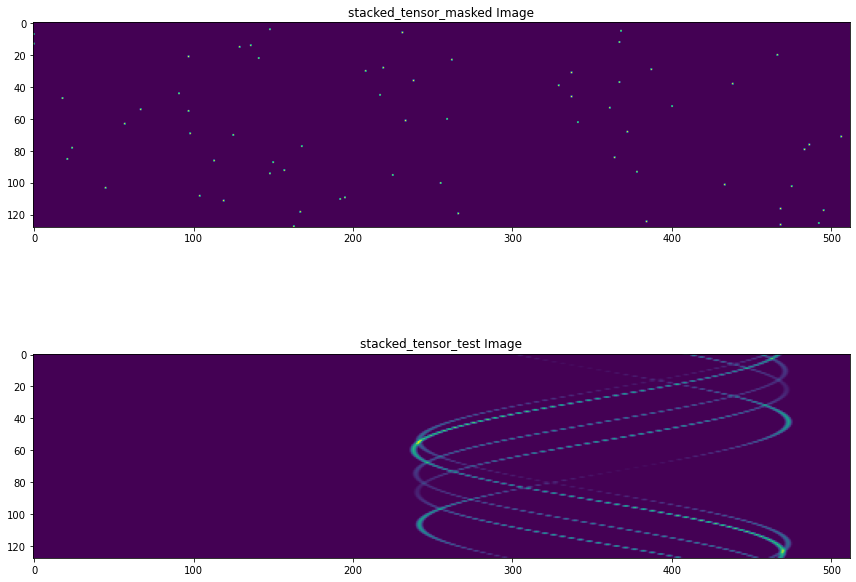

Pattern 37, False locations: (array([0]),)


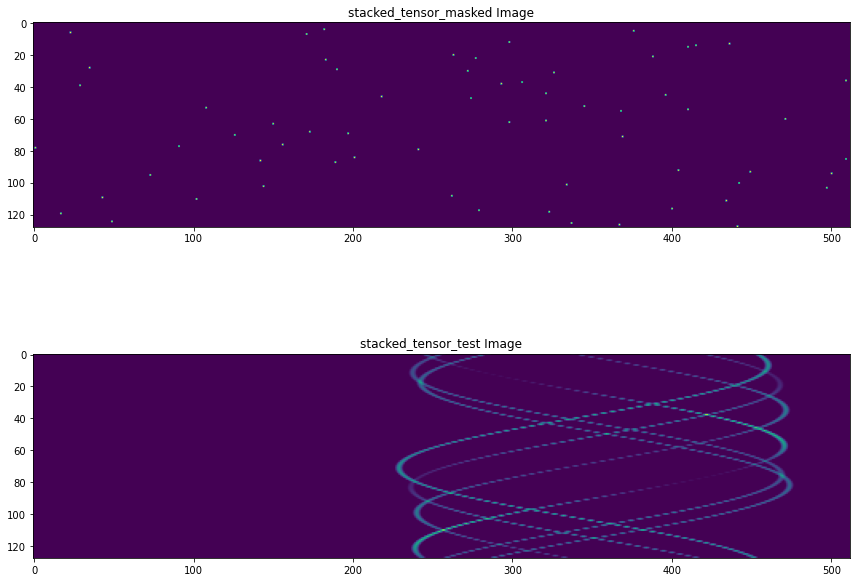

Pattern 43, False locations: (array([0]),)


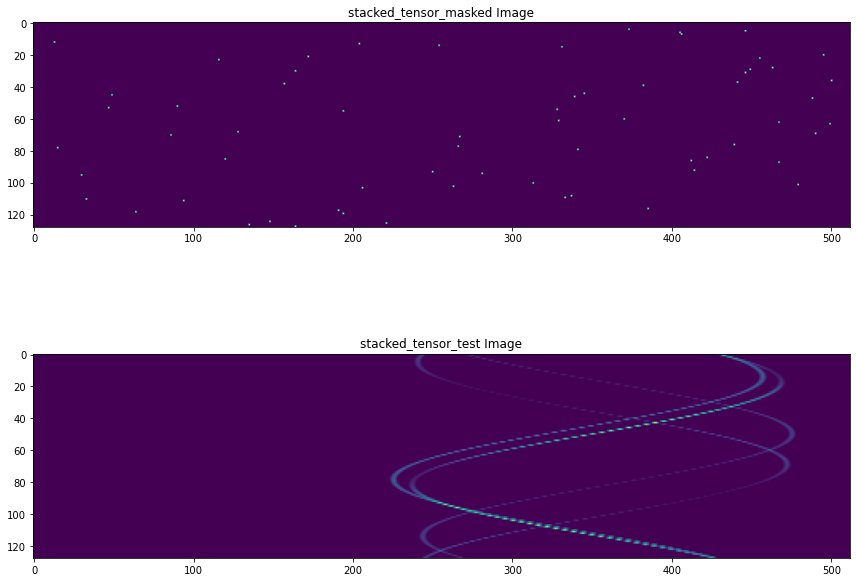

Pattern 54, False locations: (array([0]),)


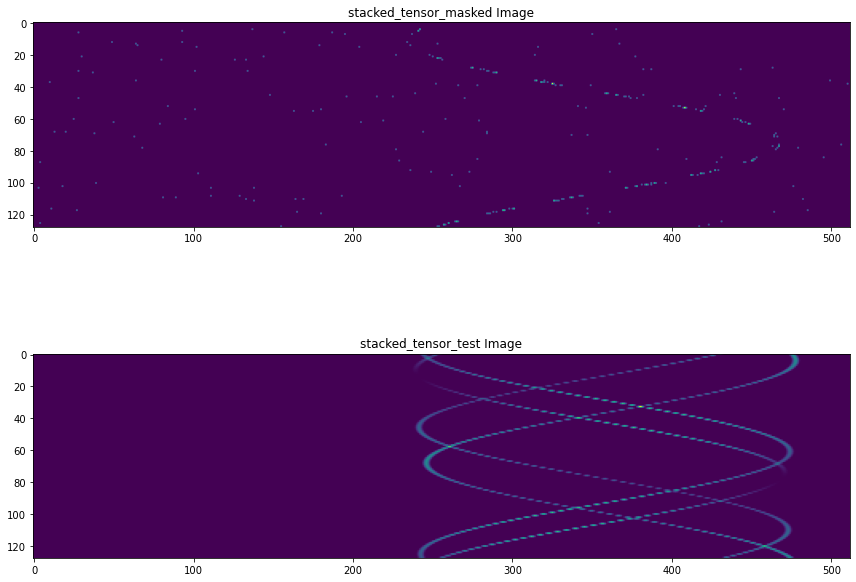

Pattern 55, False locations: (array([0]),)


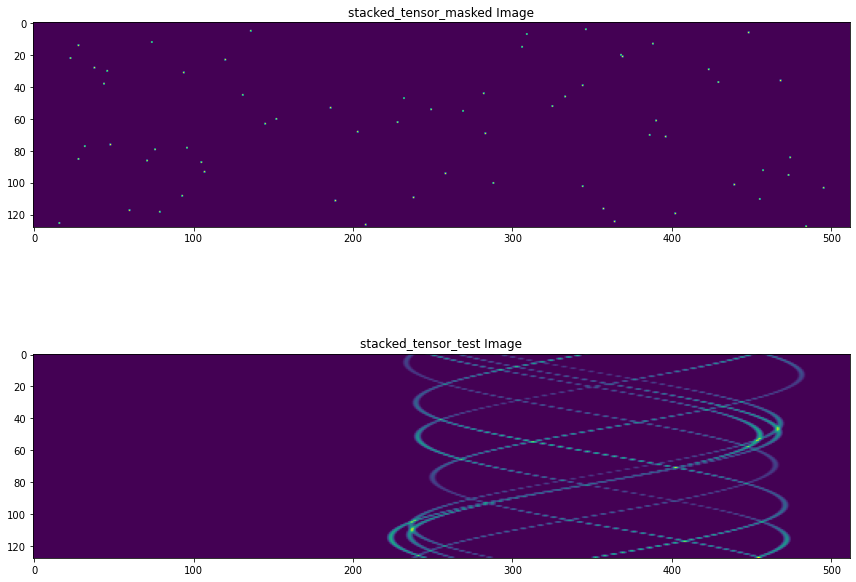

Pattern 60, False locations: (array([0]),)


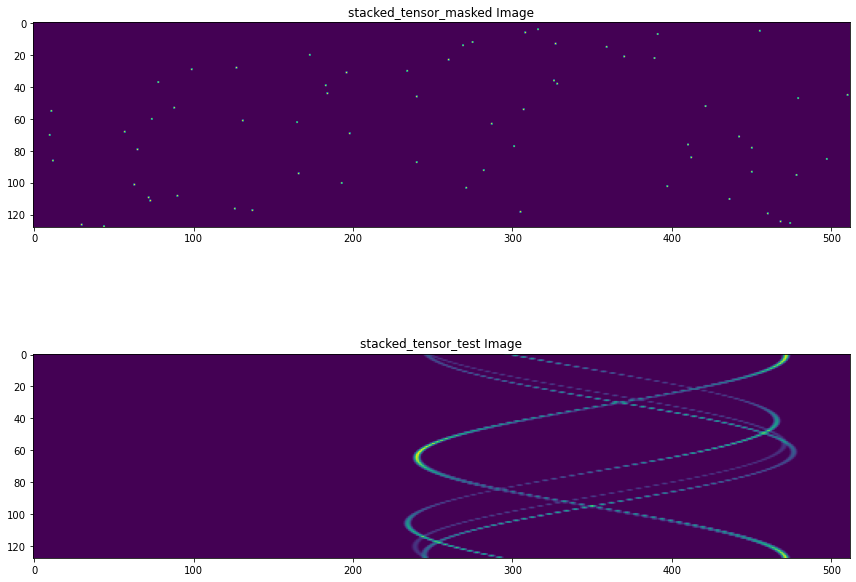

Pattern 65, False locations: (array([0]),)


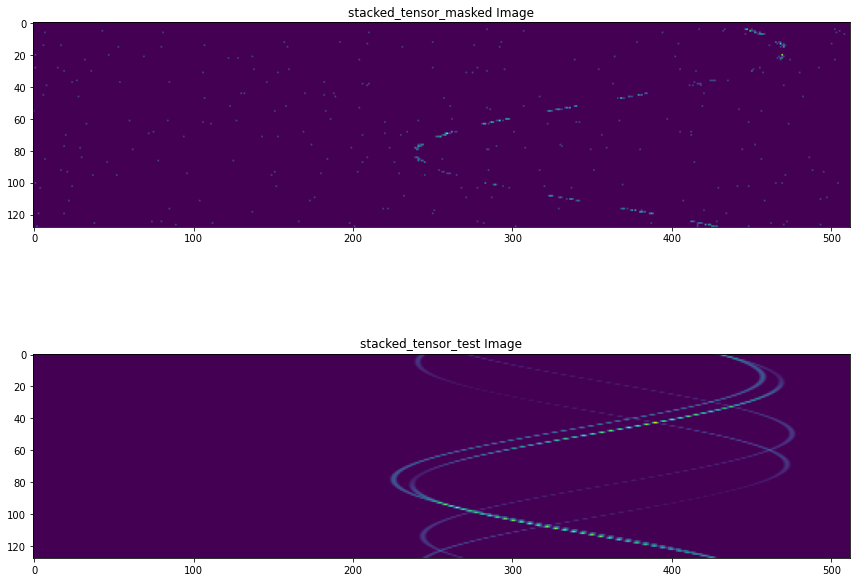

Pattern 85, False locations: (array([0]),)


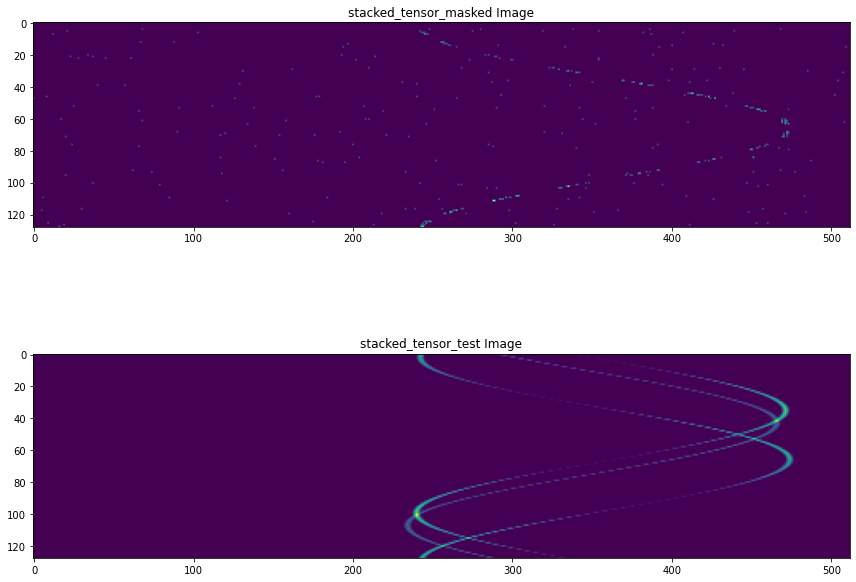

Pattern 91, False locations: (array([0]),)


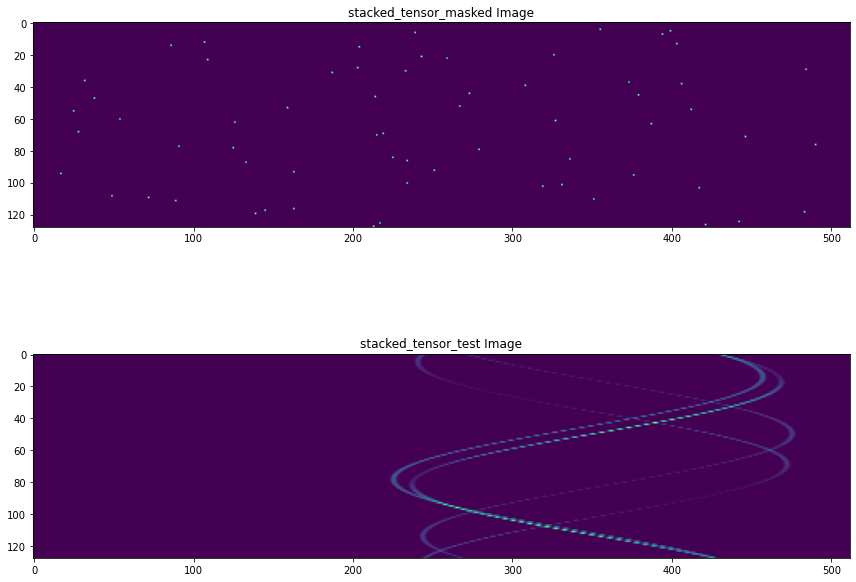

In [37]:
for pattern_index, is_equal in enumerate(comparison):
    if not is_equal:
        false_locations = np.where(~is_equal)
        print(f"Pattern {pattern_index}, False locations: {false_locations}")
        # Create a figure with two subplots side by side
        fig, axes = plt.subplots(2, 1, figsize=(12, 10))


        patNum =pattern_index
        # Plot the first image from ximgarray on the right subplot
        axes[0].imshow(stacked_tensor_masked[patNum])  # Specify cmap if the image is grayscale
        axes[0].set_title('stacked_tensor_masked Image')
        axes[0].set_aspect('equal')  # Set equal aspect ratio

        # Plot the first image from pdfarray on the left subplot
        axes[1].imshow(stacked_tensor_test[patNum])  # Specify cmap if the image is grayscale
        axes[1].set_title('stacked_tensor_test Image')
        axes[1].set_aspect('equal')  # Set equal aspect ratio

        # Adjust layout for better spacing
        plt.tight_layout()

        # Show the plot
        plt.show()